 The best solution found:                                                                           
 [198.78430907  10.78396389  18.94923677]

 Objective function:
 1.0446385533458562


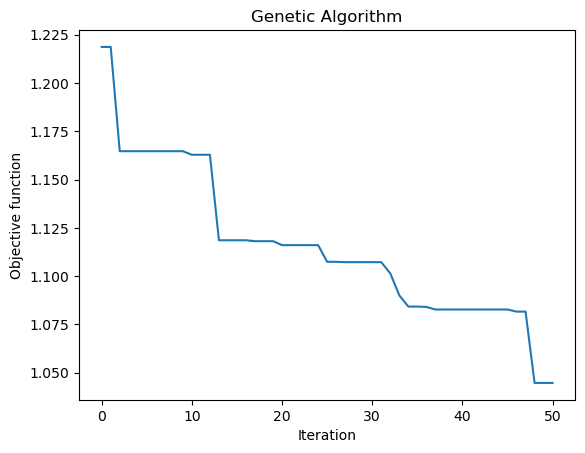


 Optimized Input Parameters (GA result):
Inlet Temp: 198.78 °C
Feed Rate: 10.78 L/h
Solids Content: 18.95 %
Predicted Moisture Content: 1.0446


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from geneticalgorithm import geneticalgorithm as ga
np.random.seed(42)
X = np.random.uniform(low=[160, 5, 10], high=[200, 20, 30], size=(100, 3))
y = (
 0.1 * (200 - X[:, 0]) + # lower temp -> higher moisture
 0.05 * (20 - X[:, 1]) + # lower feed rate -> more drying
 0.03 * (30 - X[:, 2]) + # lower solids -> more moisture
 np.random.normal(0, 0.5, 100) # some noise
)
# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X) 
# Split into train and validaƟon
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=1)
model.fit(X_train, y_train)
def objective_function(x):
 # Normalize input
    x_scaled = scaler.transform([x])
    prediction = model.predict(x_scaled)[0]
    return prediction # minimize moisture content
varbound = np.array([[160, 200], [5, 20], [10, 30]])
algorithm_params = {
 'max_num_iteration': 50,
 'population_size': 15,
 'mutation_probability': 0.1,
 'elit_ratio': 0.01,
 'crossover_probability': 0.9,
 'parents_portion': 0.3,
 'crossover_type': 'uniform',
 'max_iteration_without_improv': None
}
model_ga = ga(
 function=objective_function,
 dimension=3,
 variable_type='real',
 variable_boundaries=varbound,
 algorithm_parameters=algorithm_params
) 
model_ga.run()
best_input = model_ga.output_dict['variable']
best_prediction = model_ga.output_dict['function']
print("\n Optimized Input Parameters (GA result):")
print(f"Inlet Temp: {best_input[0]:.2f} °C")
print(f"Feed Rate: {best_input[1]:.2f} L/h")
print(f"Solids Content: {best_input[2]:.2f} %")
print(f"Predicted Moisture Content: {best_prediction:.4f}") 


In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install geneticalgorithm

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15161 sha256=455b9d27c72effe4bf60758672a59934cb4792650bbc2dec3e7a16d0d9f79cb9
  Stored in directory: c:\users\kaustubh sathe\appdata\local\pip\cache\wheels\ed\94\4a\9ccd71f7284a92e4137b7dd0ce8540c40ea7c2689251504a49
Successfully built func-timeout
Note: you may need to restart the kernel to use updated packages.
